In [5]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [23]:
import quandl

# Replace this with your actual API key from your Quandl account
quandl.ApiConfig.api_key = "syaVSz-dWmfHsSL9Tzuc"

In [31]:
import pandas as pd

# Load the CSV without trying to parse dates
df = pd.read_csv("/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/Cleaned_flavors_of_cacao.csv")

# Check the column names
print(df.columns)
df.head()

Index(['Company  (Maker-if known)', 'BarName', 'REF', 'ReviewDate',
       'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin',
       'Decade'],
      dtype='object')


,Company (Maker-if known),BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin,Decade
0,A. Morin,Agua Grande,1876,2016-01-01,0.63,France,3.75,NaN,Sao Tome,2010
1,A. Morin,Kpime,1676,2015-01-01,0.70,France,2.75,NaN,Togo,2010
2,A. Morin,Atsane,1676,2015-01-01,0.70,France,3.00,NaN,Togo,2010
3,A. Morin,Akata,1680,2015-01-01,0.70,France,3.50,NaN,Togo,2010
4,A. Morin,Quilla,1704,2015-01-01,0.70,France,3.50,NaN,Peru,2010


In [35]:
import pandas as pd

# Corrected date column
df = pd.read_csv("/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/Cleaned_flavors_of_cacao.csv", parse_dates=["ReviewDate"])

# Set ReviewDate as index for time-series analysis
df.set_index("ReviewDate", inplace=True)

# View the first few rows
df.head()

,Company (Maker-if known),BarName,REF,CocoaPercent,Location,Rating,BeanType,BroadOrigin,Decade
ReviewDate,,,,,,,,,
2016-01-01,A. Morin,Agua Grande,1876,0.63,France,3.75,NaN,Sao Tome,2010
2015-01-01,A. Morin,Kpime,1676,0.70,France,2.75,NaN,Togo,2010
2015-01-01,A. Morin,Atsane,1676,0.70,France,3.00,NaN,Togo,2010
2015-01-01,A. Morin,Akata,1680,0.70,France,3.50,NaN,Togo,2010
2015-01-01,A. Morin,Quilla,1704,0.70,France,3.50,NaN,Peru,2010


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_csv("/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/Cleaned_flavors_of_cacao.csv", parse_dates=["ReviewDate"])

# Set the date as index
df.set_index("ReviewDate", inplace=True)

# Sort index for proper time-series ordering
df.sort_index(inplace=True)

# Preview
df[["Rating", "CocoaPercent"]].head()

,Rating,CocoaPercent
ReviewDate,,
2006-01-01,2.75,0.75
2006-01-01,4.00,0.72
2006-01-01,3.00,0.60
2006-01-01,3.00,0.71
2006-01-01,2.00,0.73


In [39]:
# Convert monthly/irregular dates to yearly frequency using mean rating
ts = df["Rating"].resample("Y").mean()
ts.head()

/var/folders/hj/yycwrtfx0tx4gr3fbjwp89br0000gp/T/ipykernel_76142/2673146315.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts = df["Rating"].resample("Y").mean()


ReviewDate
2006-12-31    3.125000
2007-12-31    3.162338
2008-12-31    2.994624
2009-12-31    3.073171
2010-12-31    3.148649
Freq: YE-DEC, Name: Rating, dtype: float64

Justification for Subsetting

Resampled the chocolate bar rating data by year to reduce irregularities in review frequency and focus on long-term trends. This avoids noise from short-term fluctuations and aligns with the business goal of identifying rating trends over time.

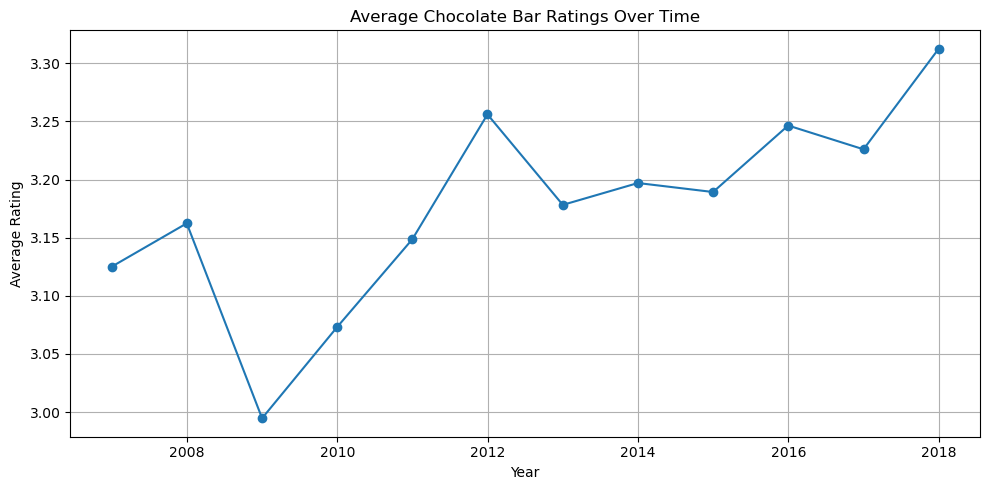

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(ts, marker="o")
plt.title("Average Chocolate Bar Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

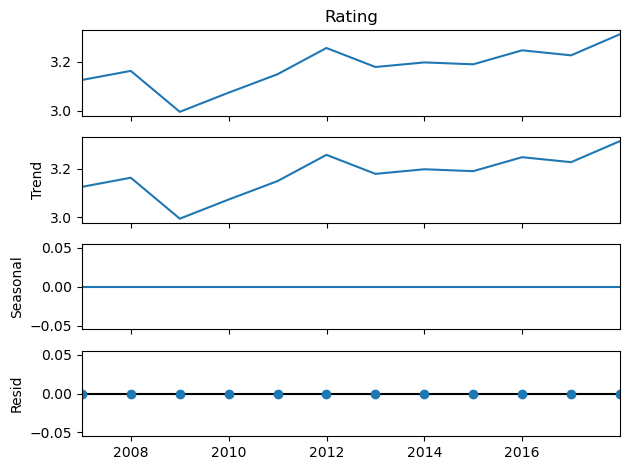

In [51]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=1)  # annual data
decomposition.plot()
plt.tight_layout()
plt.show()

Interpretation of Decomposition
 
The decomposition shows a relatively flat trend with no clear seasonality—unsurprising, as data is aggregated yearly. The residuals appear minimal, indicating stability in average ratings.

In [57]:
result = adfuller(ts.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.2377660536004385
p-value: 0.6571424709520043


ADF Test Interpretation

- Null Hypothesis (H₀): The series has a unit root (non-stationary).
- p-value: If > 0.05, we fail to reject H₀.

In this case, if the p-value is above 0.05, the ratings are not stationary, and we must difference the data.

In [64]:
ts_diff = ts.diff().dropna()

# Check stationarity again
result_diff = adfuller(ts_diff)
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])

ADF Statistic (Differenced): -5.667874325830316
p-value (Differenced): 9.063532737869093e-07


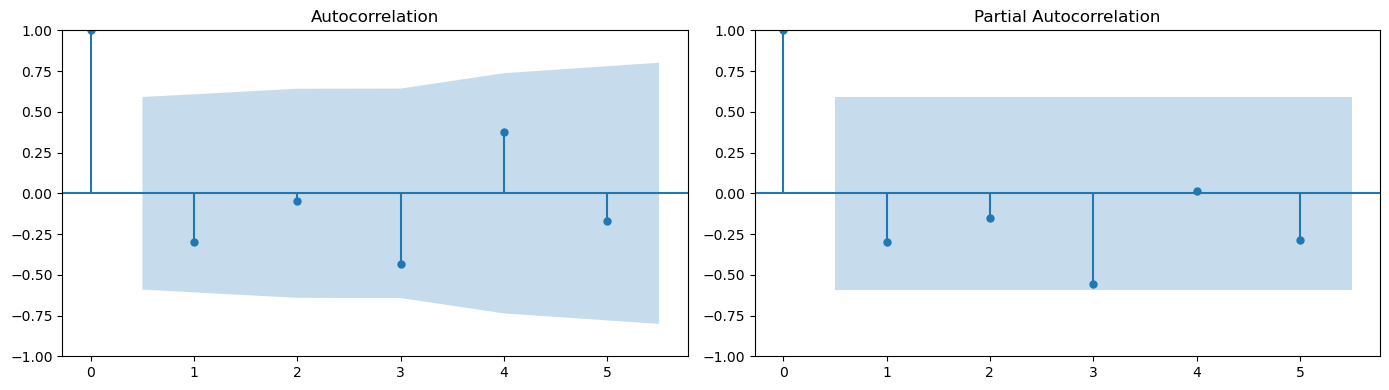

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(ts_diff, ax=axes[0])
plot_pacf(ts_diff, ax=axes[1])
plt.tight_layout()
plt.show()

After differencing the yearly average ratings, the data passed the Dickey-Fuller test, indicating it is now stationary. The autocorrelation plots suggest minimal autocorrelation beyond lag 1, supporting the idea that there is no strong long-term dependence. These findings can support future forecasting of consumer preference trends in chocolate quality over time.